In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [14]:
# Write A function to create complementary color image
def complementary_color_RGB(img):
    # Split the image into three channels
    b, g, r = cv.split(img)

    b = cv.bitwise_not(b)
    g = cv.bitwise_not(g)
    r = cv.bitwise_not(r)

    # Merge the three channels
    img = cv.merge([b, g, r])

    return img

In [15]:
def complementary_color_HSI(img):
    complementary_img = img.copy()

    h, s, i = complementary_img[:, :, 0], complementary_img[:, :, 1], complementary_img[:, :, 2]
    h = (h + 0.5) % 1.0

    return complementary_img

In [16]:
def convertRGB2HSI(img):

    # Convert RGB to HSI
    width, height, channel = img.shape

    # Create a new image
    new_img = np.zeros((width, height, channel), dtype=np.float64)

    for i in range(width):
        for j in range(height):
            # Get RGB value
            red, green, blue = img[i, j, 2], img[i, j, 1], img[i, j, 0]
            red, green, blue = red / 255.0, green / 255.0, blue / 255.0

            # Convert RGB to HSI
            intensity = max([red, green, blue])
            delta = intensity - min([red, green, blue])

            if intensity == 0:
                saturation = 0
                hue = 0
            elif delta == 0:
                saturation = 0
                hue = 0
            else:
                saturation = delta / intensity

                hue = 0
                if red == intensity:
                    hue = (green - blue) / (delta * 6)
                elif green == intensity:
                    hue = (2.0 + ((blue - red) / delta)) / 6.0
                elif blue == intensity:
                    hue = (4.0 + ((red - green) / delta)) / 6.0

            hue = (hue + 1) % 1
            new_img[i, j] = [hue, saturation, intensity]

    return new_img

In [17]:
def convertHSI2RGB(img):

    # Convert HSI to RGB
    width, height, channel = img.shape

    # Create a new image
    new_img = np.zeros((width, height, channel), dtype=np.uint8)

    for i in range(width):
        for j in range(height):
            # Get HSI value
            hue, saturation, intensity = img[i, j]

            r, g, b = 0.0, 0.0, 0.0

            H_prime = math.floor(hue * 6)
            F = (hue * 6) - H_prime
            P = intensity * (1 - saturation)
            Q = intensity * (1 - (F * saturation))
            T = intensity * (1 - ((1 - F) * saturation))

            if H_prime == 0:
                r = intensity
                g = T
                b = P
            elif H_prime == 1:
                r = Q
                g = intensity
                b = P
            elif H_prime == 2:
                r = P
                g = intensity
                b = T
            elif H_prime == 3:
                r = P
                g = Q
                b = intensity
            elif H_prime == 4:
                r = T
                g = P
                b = intensity
            elif H_prime == 5:
                r = intensity
                g = P
                b = Q

            new_img[i, j] = [r * 255, g * 255, b * 255]

    return new_img

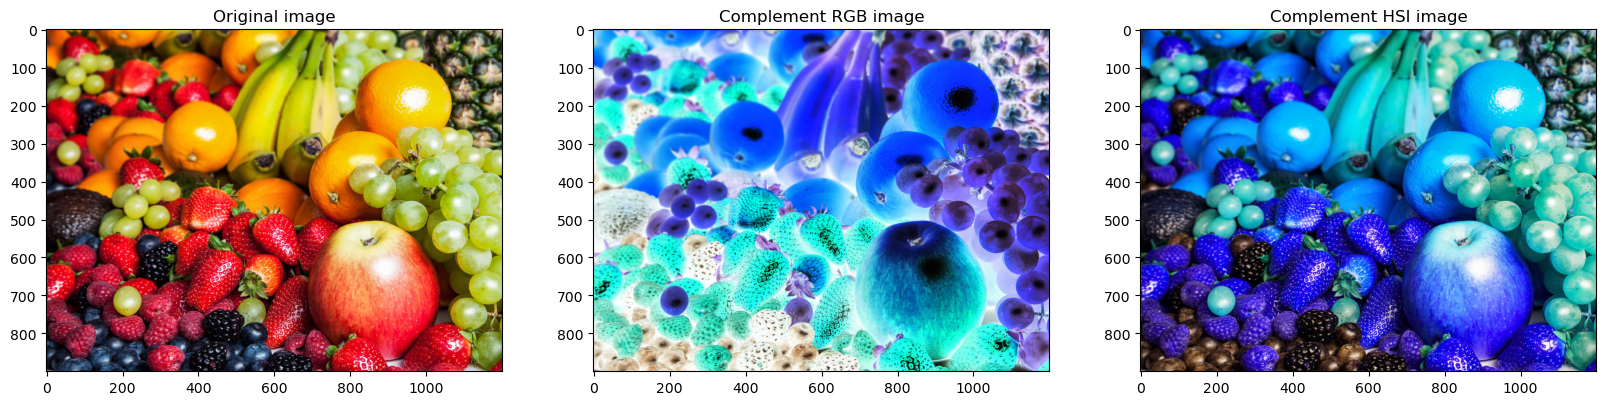

In [18]:
# Remove the output folder if it exists
if os.path.exists("output/"):
    os.system("rm -rf output/")

os.mkdir("output/")
os.mkdir("output/5_1")

# Read image
fruit_path = "img/fruit.jpg"
fruit = cv.imread(fruit_path, cv.IMREAD_COLOR)
fruit_rgb = cv.cvtColor(fruit, cv.COLOR_BGR2RGB)
fruit_hsi = convertRGB2HSI(fruit_rgb)

fruit_complementary_HSI = convertHSI2RGB(complementary_color_HSI(fruit_hsi))
fruit_complementary_RGB = complementary_color_RGB(fruit_rgb)

cv.imwrite("output/5_1/5_1_complementary_RGB.jpg", cv.cvtColor(fruit_complementary_RGB, cv.COLOR_RGB2BGR))
cv.imwrite("output/5_1/5_1_complementary_HSI.jpg", cv.cvtColor(fruit_complementary_HSI, cv.COLOR_RGB2BGR))

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(cv.cvtColor(fruit, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")

ax[1].imshow(fruit_complementary_RGB)
ax[1].set_title("Complement RGB image")

ax[2].imshow(fruit_complementary_HSI)
ax[2].set_title("Complement HSI image")

plt.savefig("output/5_1/5_1.png")
plt.show()